# **Importando os dados**

In [4]:
#importando a biblioteca pandas para ler os dados
import pandas as pd

# importando a base de dados nova
serie_temporal = pd.read_csv("serie_CORURIPE_ÓBITO.csv", sep = ",", encoding='latin')['Data de confirmaÃ§Ã£o']

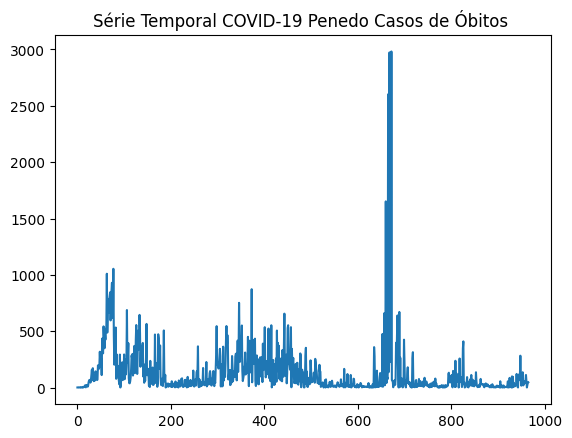

In [5]:
#importando a biblioteca
import matplotlib.pyplot as plt
plt.title("Série Temporal COVID-19 Penedo Casos de Óbitos ")
plt.plot(serie_temporal)

# **Estatísticas Descritivas da Série Temporal**

In [6]:
# # biblioteca para agrupar os dados
# from pandas import Grouper
# # printando a quantidade de grupos gerados
# agrupamento_mes.ngroups
# #printando a quantidade de elementos por grupo
# agrupamento_mes.size()

In [7]:
# # gerar o plot por ano


# # valores_meses -> salva o conteudo por cada mes para poder gerar o boxplot
# valores_ano = []
# for nome_grupo, conteudo_grupo in agrupamento_ano:
#    #print(nome_grupo)
#    #print(conteudo_grupo)
#    valores_ano.append(conteudo_grupo)



# **Analise da Composição da Série Temporal**

In [8]:
# lib to use the decomposition in the time series
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# ajustando a data da serie para poder realizar a decomposição
serie_temporal.index = pd.Series(pd.date_range(serie_temporal.index[0], periods=len(serie_temporal.index) , freq="d"))
serie_temporal

1970-01-01     1
1970-01-02     1
1970-01-03     3
1970-01-04     1
1970-01-05     1
              ..
1972-08-19    52
1972-08-20     1
1972-08-21    21
1972-08-22    45
1972-08-23    47
Name: Data de confirmaÃ§Ã£o, Length: 966, dtype: int64

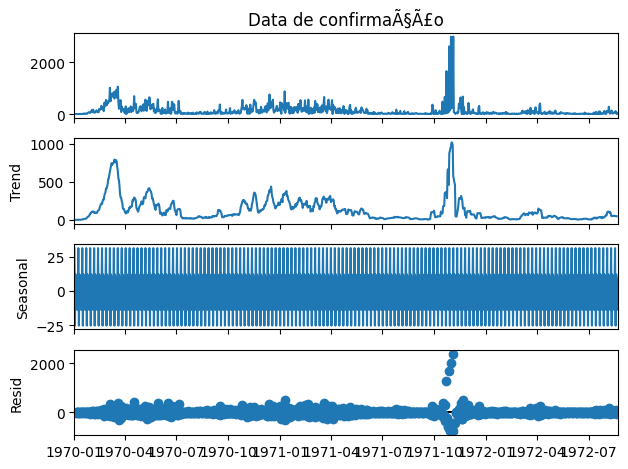

In [10]:
# decomposicao da serie temporal
result = seasonal_decompose(serie_temporal, model='additive')
result.plot()
plt.show()

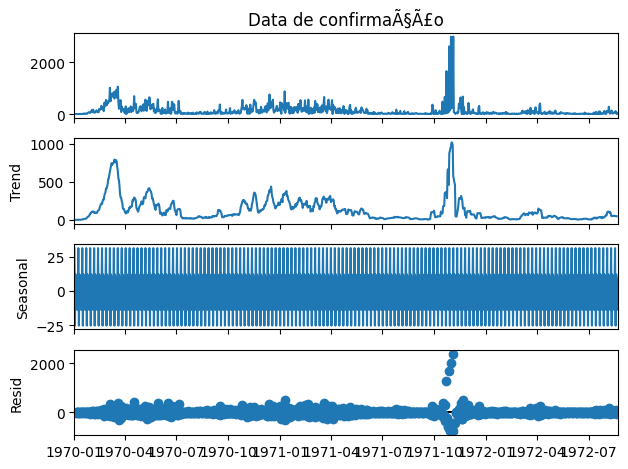

In [11]:
# decomposicao da serie temporal
result = seasonal_decompose(serie_temporal, model='additive')
result.plot()
plt.show()

In [12]:
# lib to use the acf and pcf correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

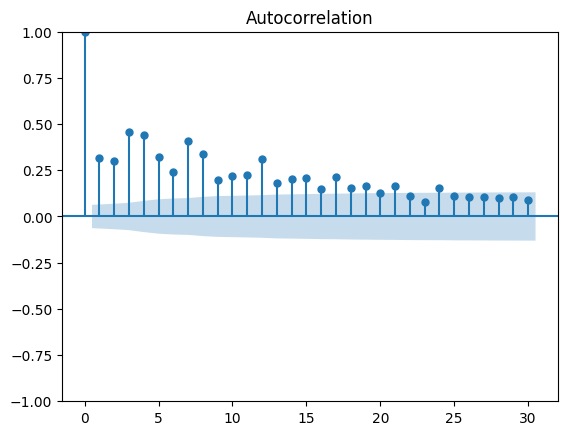

In [13]:
plot_acf(serie_temporal, lags=30)
plt.show()

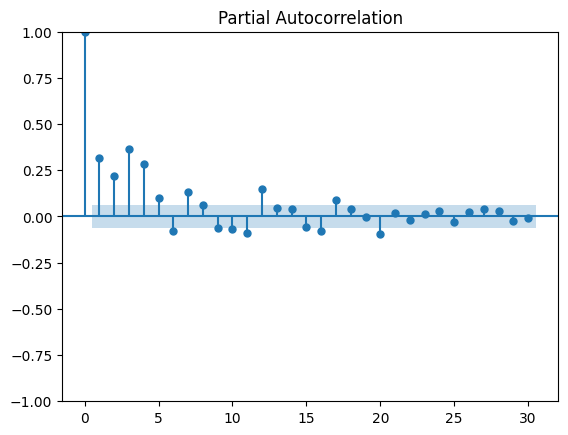

In [14]:
plot_pacf(serie_temporal, lags=30)
plt.show()

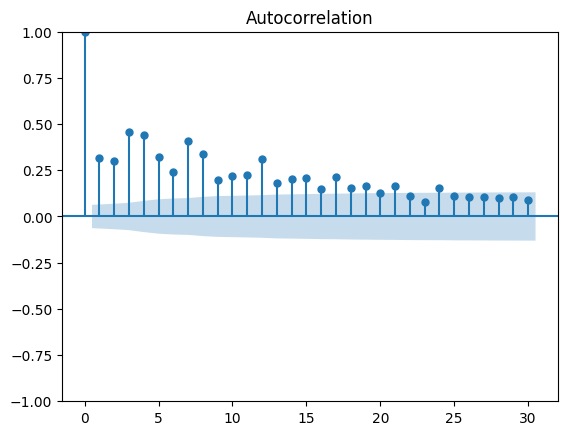

In [15]:
plot_acf(serie_temporal, lags=30)
plt.show()


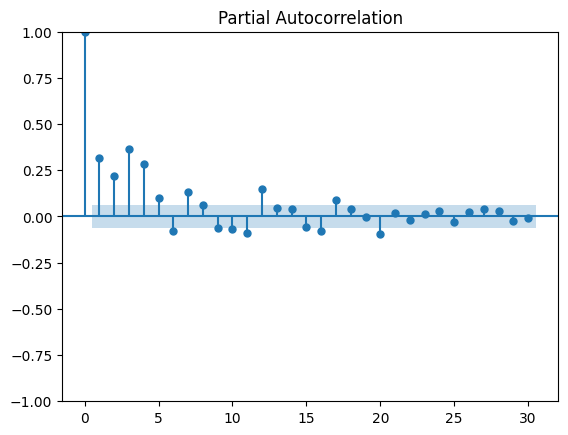

In [16]:
plot_pacf(serie_temporal, lags=30)
plt.show()

# **Pré-processamento dos Dados**

In [17]:
def Janela_tempo(serie, p):
        '''
        metodo que transforma um vetor em uma matriz com os dados de entrada e um vetor com as respectivas saidas
        :param serie: serie temporal que sera remodelada
        :return: retorna duas variaveis, uma matriz com os dados de entrada e um vetor com os dados de saida: matriz_entrada, vetor_saida
        '''

        tamanho_matriz = len(serie) - p

        matriz_entrada = []
        for i in range(tamanho_matriz):
            matriz_entrada.append([0.0] * p)

        vetor_saida = []
        for i in range(len(matriz_entrada)):
            matriz_entrada[i] = serie[i:i+p]
            vetor_saida.append(serie[i+p])

        return matriz_entrada, vetor_saida

In [18]:
def Normalizar(serie):
        '''
        metodo que normaliza a serie temporal em um intervalo de [0, 1]
        :param serie: serie temporal que sera remodelada
        :return: retorna a serie normalizada
        '''
        import numpy as np

        min = np.min(serie)
        max = np.max(serie)

        serie_norm = []
        for i in serie:
            valor = (i - min)/(max - min)
            serie_norm.append(valor)

        return np.array(serie_norm)

In [19]:
serie_normalizada = Normalizar(serie_temporal)

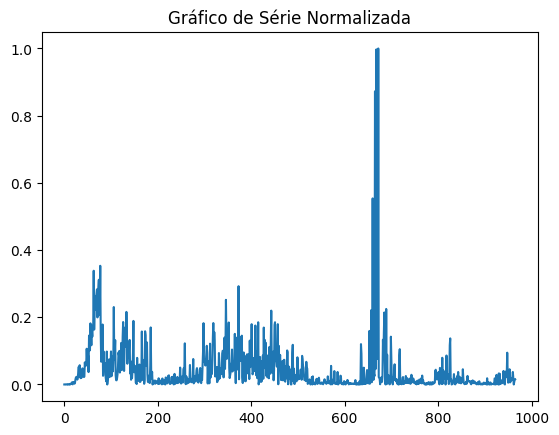

In [20]:
# importando o matplotlib
import matplotlib.pyplot as plt

# plotando a serie normalizada
plt.plot(serie_normalizada)
plt.title("Gráfico de Série Normalizada")
plt.show()

In [21]:
# separando os padrões e os alvos
X, y = Janela_tempo(serie_normalizada, 15)

In [22]:
# definindo o tamanho de treinamento e teste
tamanho_treinamento = 0.8 * len(serie_normalizada)
tamanho_treinamento = int(round(tamanho_treinamento))
tamanho_treinamento

773

In [23]:
tamanho_teste = 0.2 * len(serie_normalizada) #definindo o tamanho do teste em 20% para a serie temporal
tamanho_teste = int(round(tamanho_teste))   #convertendo o valor do teste para numero inteiro

In [24]:
# conjunto de treinamento
X_treinamento = X[0:tamanho_treinamento]
y_treinamento = y[0:tamanho_treinamento]

# conjunto de teste
X_teste = X[tamanho_treinamento+1:]
y_teste = y[tamanho_treinamento+1:]

# **GridSearch nos Modelos**

**MLPRegressor**

In [25]:
# importando o modelo
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suprimir os warnings de convergência
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Dividindo os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# instanciando o modelo
mlp = MLPRegressor()

# Definindo os parâmetros para o GridSearchCV
parameters = {'hidden_layer_sizes': [(5,), (10,), (15,), (20,), (30,)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001], 'max_iter': [50, 80, 100, 150]}

# Usando o GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(mlp, parameters, cv=5)
grid_search.fit(X_treinamento, y_treinamento)


# Melhores parâmetros encontrados para o MLP
mlp_params = grid_search.best_params_
print("Melhores parâmetros :", mlp_params)

# Obter o melhor modelo após a busca
melhor_modelo = grid_search.best_estimator_

# Fazer previsões usando o modelo otimizado
previsoes = melhor_modelo.predict(X_teste)

# Avaliar a performance do modelo otimizado
mse = mean_squared_error(y_teste, previsoes)
print("Erro quadrático médio (MSE) do modelo otimizado:", mse)


Melhores parâmetros : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (30,), 'max_iter': 50}
Erro quadrático médio (MSE) do modelo otimizado: 0.006148421469317033


**Árvore de decisão**

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Instanciando o modelo DecisionTreeRegressor
clf = DecisionTreeRegressor()

# Definindo os parâmetros para GridSearchCV
parameters = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(clf, parameters, cv=5)
grid_search.fit(X_treinamento, y_treinamento)

# Melhores parâmetros encontrados
clf_params = grid_search.best_params_
print("Melhores parâmetros :", clf_params)

# Fazer previsões usando o modelo otimizado
previsoes = grid_search.predict(X_teste)

# Avaliar a performance do modelo otimizado
mse = mean_squared_error(y_teste, previsoes)
print("Erro quadrático médio (MSE) do modelo otimizado:", mse)


Melhores parâmetros : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Erro quadrático médio (MSE) do modelo otimizado: 0.010571397757776567


**SVM**

In [27]:
# Instanciando o modelo DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# instanciando o modelo
svr = svm.SVR()

# Definindo os parâmetros para GridSearchCV
parameters = {
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
    #'gamma': ['scale', 'auto']
}

# Usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(svr, parameters, cv=5)
grid_search.fit(X_treinamento, y_treinamento)

# Melhores parâmetros encontrados
svr_params = grid_search.best_params_
print("Melhores parâmetros :", svr_params)

# Fazer previsões usando o modelo otimizado
previsoes = grid_search.predict(X_teste)

# Avaliar a performance do modelo otimizado
mse = mean_squared_error(y_teste, previsoes)
print("Erro quadrático médio (MSE) do modelo otimizado:", mse)


Melhores parâmetros : {'C': 10, 'kernel': 'rbf'}
Erro quadrático médio (MSE) do modelo otimizado: 0.007815642163174687


**LASSO**

In [28]:
# Instanciando o modelo DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# instanciando o modelo
lasso = Lasso()

# Definindo os parâmetros para GridSearchCV
parameters = {
    'alpha': [0.001, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

# Usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(lasso, parameters, cv=5)
grid_search.fit(X_treinamento, y_treinamento)

# Melhores parâmetros encontrados
lasso_params = grid_search.best_params_
print("Melhores parâmetros :", lasso_params)

# Fazer previsões usando o modelo otimizado
previsoes = grid_search.predict(X_teste)

# Avaliar a performance do modelo otimizado
mse = mean_squared_error(y_teste, previsoes)
print("Erro quadrático médio (MSE) do modelo otimizado:", mse)


Melhores parâmetros : {'alpha': 0.001, 'max_iter': 1000}
Erro quadrático médio (MSE) do modelo otimizado: 0.00701807378638857


**LARSLASSO**

In [29]:
# Instanciando o modelo DecisionTreeRegressor
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# instanciando o modelo
lasso = LassoLars()

# Definindo os parâmetros para GridSearchCV
parameters = {
    'alpha': [0.001, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

# Usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(lasso, parameters, cv=5)
grid_search.fit(X_treinamento, y_treinamento)

# Melhores parâmetros encontrados
lasso_lars_params = grid_search.best_params_
print("Melhores parâmetros :", lasso_lars_params)

# Fazer previsões usando o modelo otimizado
previsoes = grid_search.predict(X_teste)

# Avaliar a performance do modelo otimizado
mse = mean_squared_error(y_teste, previsoes)
print("Erro quadrático médio (MSE) do modelo otimizado:", mse)


Melhores parâmetros : {'alpha': 0.001, 'max_iter': 1000}
Erro quadrático médio (MSE) do modelo otimizado: 0.007018072611630612


**LinearRegression**

In [30]:
# Instanciando o modelo DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# instanciando o modelo
linear_regression = LinearRegression()

# Definindo os parâmetros para GridSearchCV
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(linear_regression, parameters, cv=5)
grid_search.fit(X_treinamento, y_treinamento)

# Melhores parâmetros encontrados
lr_params = grid_search.best_params_
print("Melhores parâmetros :", lr_params)

# Fazer previsões usando o modelo otimizado
previsoes = grid_search.predict(X_teste)

# Avaliar a performance do modelo otimizado
mse = mean_squared_error(y_teste, previsoes)
print("Erro quadrático médio (MSE) do modelo otimizado:", mse)


Melhores parâmetros : {'copy_X': True, 'fit_intercept': True}
Erro quadrático médio (MSE) do modelo otimizado: 0.007857126199441438


# **Treinando os Modelos**

**MLP**

In [31]:
# importando o modelo
from sklearn.neural_network import MLPRegressor

# instanciando o modelo
mlp = MLPRegressor(activation=mlp_params['activation'],
                   alpha=mlp_params['alpha'],
                   hidden_layer_sizes=mlp_params['hidden_layer_sizes'],
                   max_iter=mlp_params['max_iter'])

# treinando o modelo
mlp.fit(X_treinamento, y_treinamento)


MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)

**Treinamento**

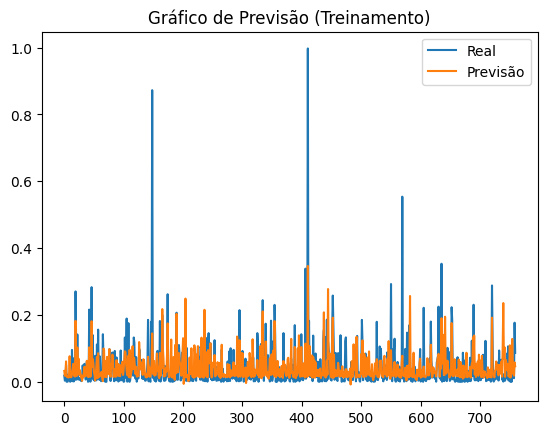

In [32]:
y_prev_treinamento = mlp.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Treinamento)")
plt.show()

**Teste**

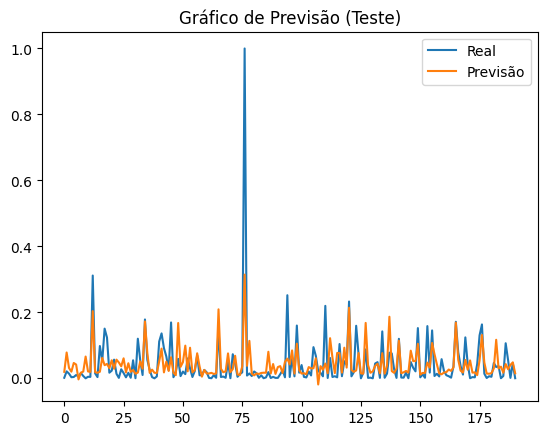

In [33]:
y_prev_teste = mlp.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Teste)")
plt.show()

**Avaliação**

In [34]:
from sklearn.metrics import mean_squared_error

# computando o erro para treinamento
erro_treinamento_mlp = mean_squared_error(y_treinamento, y_prev_treinamento)
print("erro treinamento: ", erro_treinamento_mlp)

# computando o erro para treinamento
erro_teste_mlp = mean_squared_error(y_teste, y_prev_teste)
print("erro teste: ", erro_teste_mlp)

erro treinamento:  0.0036260371755556953
erro teste:  0.00433912422859698


**SVM**

In [35]:
# importando o modelo
from sklearn import svm

# instanciando o modelo
svr = svm.SVR(C=svr_params['C'],
              #gamma=svr_params['gamma'],
              kernel=svr_params['kernel'])

# treinando o modelo
svr.fit(X_treinamento, y_treinamento)

SVR(C=10)

**Treinamento**

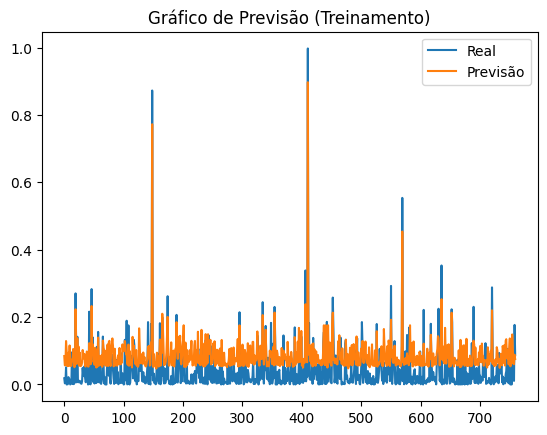

In [36]:
y_prev_treinamento = svr.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Treinamento)")
plt.show()

**Teste**

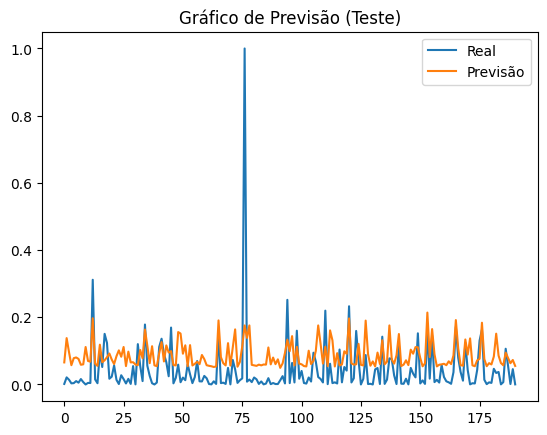

In [37]:
y_prev_teste = svr.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Teste)")
plt.show()

**Avaliação**

In [38]:
from sklearn.metrics import mean_squared_error

# computando o erro para treinamento
erro_treinamento_svm= mean_squared_error(y_treinamento, y_prev_treinamento)
print("erro treinamento: svm ", erro_treinamento_svm)

# computando o erro para teste
erro_teste_svm = mean_squared_error(y_teste, y_prev_teste)
print("erro teste: svm", erro_teste_svm)

erro treinamento: svm  0.0035408066971680495
erro teste: svm 0.007815642163174687


**ÁRVORE DE DECISÃO**

In [39]:
# importando o modelo
from sklearn import tree

# instanciando o modelo
clf = tree.DecisionTreeRegressor(max_depth=clf_params['max_depth'],
                                 min_samples_leaf=clf_params['min_samples_leaf'],
                                 min_samples_split=clf_params['min_samples_split'])

# treinando o modelo
clf = clf.fit(X_treinamento, y_treinamento)

**Treinamento**

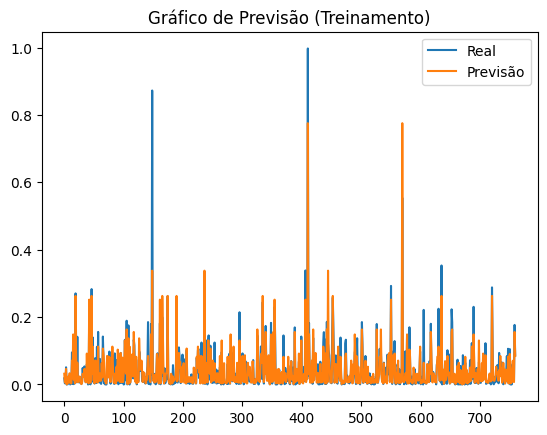

In [40]:
y_prev_treinamento = clf.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Treinamento)")
plt.show()

**Teste**

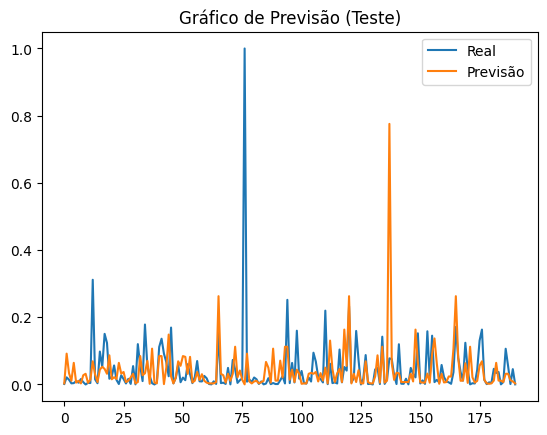

In [41]:
y_prev_teste = clf.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Teste)")
plt.show()

**Avaliação**

In [42]:
from sklearn.metrics import mean_squared_error

# computando o erro para treinamento
erro_treinamento_tree = mean_squared_error(y_treinamento, y_prev_treinamento)
print("erro treinamento:arvore ", erro_treinamento_tree)

# computando o erro para teste
erro_teste_tree = mean_squared_error(y_teste, y_prev_teste)
print("erro teste: arvore ", erro_teste_tree)

erro treinamento:arvore  0.0012673735068826023
erro teste: arvore  0.010571397757776567


**LASSO**

In [43]:
# importando o modelo
from sklearn import linear_model

# instanciando o modelo
lasso = linear_model.Lasso(alpha=lasso_params['alpha'],
                         max_iter=lasso_params['max_iter'])

# treinando o modelo
lasso.fit(X_treinamento, y_treinamento)

Lasso(alpha=0.001)

**Treinamento**

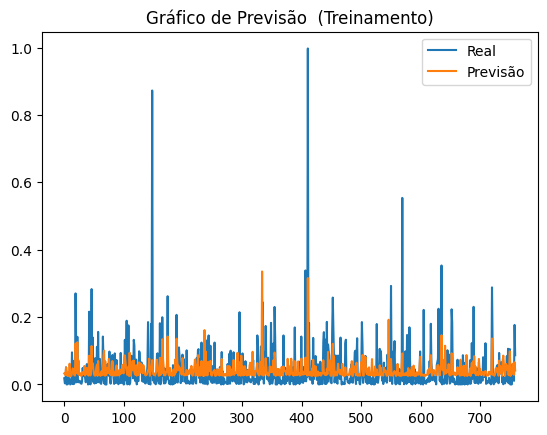

In [44]:
y_prev_treinamento = lasso.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão  (Treinamento)")
plt.show()

**Teste**

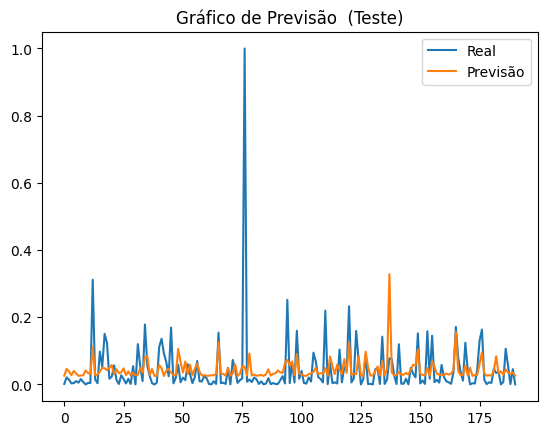

In [45]:
y_prev_teste = lasso.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão  (Teste)")
plt.show()

**Avaliação**

In [46]:
from sklearn.metrics import mean_squared_error

# computando o erro para treinamento
erro_treinamento_lasso = mean_squared_error(y_treinamento, y_prev_treinamento)
print("erro treinamento: lasso ", erro_treinamento_lasso)

# computando o erro para teste
erro_teste_lasso = mean_squared_error(y_teste, y_prev_teste)
print("erro teste: lasso ", erro_teste_lasso)

erro treinamento: lasso  0.0038791758981939492
erro teste: lasso  0.00701807378638857


**LARSLASSO**

In [47]:
# importando o modelo
from sklearn import linear_model


# instanciando o modelo
lassoLars = linear_model.LassoLars(alpha=lasso_lars_params['alpha'],
                            max_iter=lasso_lars_params['max_iter'])

# treinando o modelo
lassoLars.fit(X_treinamento, y_treinamento)

LassoLars(alpha=0.001, max_iter=1000)

**Treinamento**

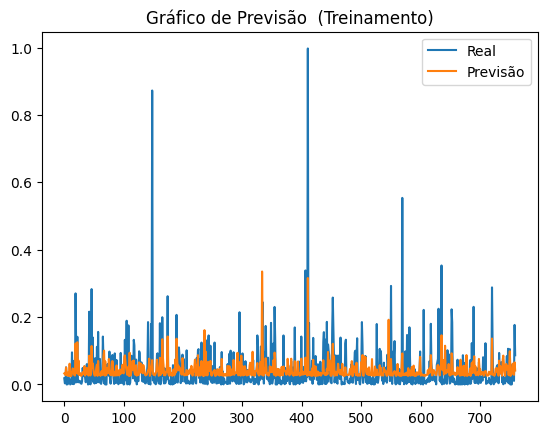

In [48]:
y_prev_treinamento = lassoLars.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão  (Treinamento)")
plt.show()

**Teste**

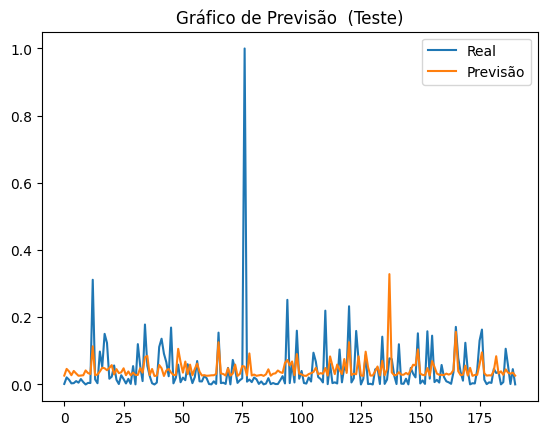

In [49]:
y_prev_teste = lassoLars.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão  (Teste)")
plt.show()

**Avaliação**

In [50]:
from sklearn.metrics import mean_squared_error

# computando o erro para treinamento
erro_treinamento_larslasso = mean_squared_error(y_treinamento, y_prev_treinamento)
print("erro treinamento: larslasso", erro_treinamento_larslasso)

# computando o erro para teste
erro_teste_larslasso = mean_squared_error(y_teste, y_prev_teste)
print("erro teste: larslasso", erro_teste_larslasso)

erro treinamento: larslasso 0.0038791737302498693
erro teste: larslasso 0.007018072611630612


**LINEAR  REGRESSION**

In [51]:
# importando o modelo
from sklearn.linear_model import LinearRegression

# instanciando o modelo'
lr = LinearRegression(copy_X=lr_params['copy_X'],
                       fit_intercept=lr_params['fit_intercept'])

# treinando o modelo

lr.fit(X_treinamento,y_treinamento)

LinearRegression()

**Treinamento**

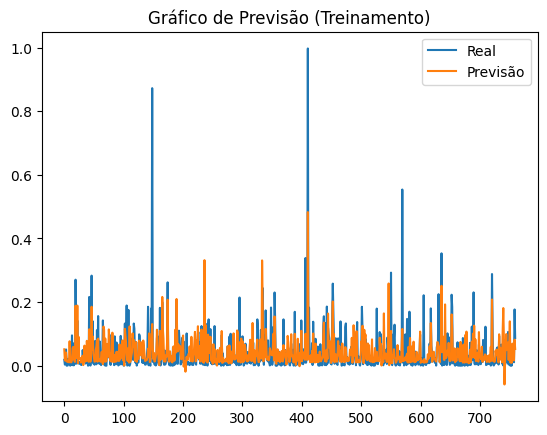

In [52]:
y_prev_treinamento = lr.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Treinamento)")
plt.show()

**Teste**

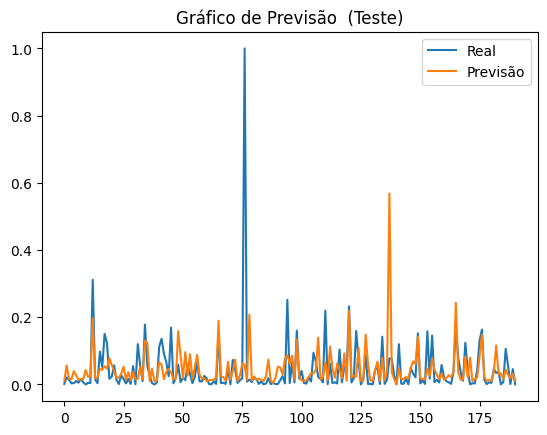

In [53]:
y_prev_teste = lr.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão  (Teste)")
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression

# computando o erro para treinamento
erro_treinamento_LinearRegression = mean_squared_error(y_treinamento, y_prev_treinamento)
print("erro treinamento: LinearRegression ", erro_treinamento_LinearRegression )

# computando o erro para teste
erro_teste_LinearRegression  = mean_squared_error(y_teste, y_prev_teste)
print("erro teste: LinearRegression ", erro_teste_LinearRegression)

erro treinamento: LinearRegression  0.003390384220313892
erro teste: LinearRegression  0.007857126199441438


**TAXA DE ERROS POR MODELOS**

In [55]:
#print("erro treinamento mlp: ", erro_treinamento_mlp)
print("erro teste mlp: ", erro_teste_mlp)

#print("erro treinamento: svm", erro_treinamento_svm)
#print("erro teste: svm", erro_teste_svm)

#print("erro treinamento arvore: ", erro_treinamento_tree)
print("erro teste arvore: ", erro_teste_tree)

#print("erro treinamento: Linear Regression ", erro_treinamento_LinearRegression )
print("erro teste: Linear Regression  ", erro_teste_LinearRegression  )

#print("erro treinamento: larslasso", erro_treinamento_larslasso)
print("erro teste: larslasso", erro_teste_larslasso)

#print("erro treinamento: lasso ", erro_treinamento_lasso)
print("erro teste: lasso ", erro_teste_lasso)

erro teste mlp:  0.00433912422859698
erro teste arvore:  0.010571397757776567
erro teste: Linear Regression   0.007857126199441438
erro teste: larslasso 0.007018072611630612
erro teste: lasso  0.00701807378638857



# **Ensemble - Combinação de Modelos Preditivos (Método Proposto)**


In [56]:
from scipy import stats
from sklearn.ensemble import VotingRegressor

class CustomVotingRegressor:
    def __init__(self, models, voting='mean'):
        """
        Initialize CustomVotingRegressor.

        Parameters:
        - voting: str, default='mean'
            Type of combination to be used. It can be 'mean', 'mode', or 'median'.
        """
        self.models = models
        self.voting = voting
        self.voting_regressor = None

    def fit(self, X, y):
        """
        Fit the models to the training data.

        Parameters:
        - models: list of tuples
            List of tuples containing the name and the model itself.
        """
        self.voting_regressor = VotingRegressor(estimators=self.models)
        self.voting_regressor.fit(X, y)

    def mode(self, vetor):
        """
        Calcula a moda de um vetor.

        Parameters:
        - vetor: array-like
            Vetor para calcular a moda.

        Returns:
        - moda: array-like
            Moda do vetor.
        """
        moda = np.apply_along_axis(lambda x: stats.mode(x)[0], axis=0, arr=vetor)
        return moda

    def predict(self, X):
        """
        Make predictions on the test data.

        Parameters:
        - X: array-like of shape (n_samples, n_features)
            Test samples.

        Returns:
        - predictions: array-like of shape (n_samples,)
            Predicted target values.
        """
        if self.voting == 'mean':
            predictions = np.mean([model.predict(X) for _, model in self.voting_regressor.named_estimators_.items()], axis=0)
        elif self.voting == 'mode':
            predictions = self.mode([model.predict(X) for _, model in self.voting_regressor.named_estimators_.items()])
        elif self.voting == 'median':
            predictions = np.median([model.predict(X) for _, model in self.voting_regressor.named_estimators_.items()], axis=0)
        else:
            raise ValueError("Invalid voting type. Please choose 'mean', 'mode', or 'median'.")

        return predictions

In [57]:
from scipy import stats
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

class CustomVotingRegressor2:
    def __init__(self, models, voting='mean'):
        """
        Initialize CustomVotingRegressor.

        Parameters:
        - voting: str, default='mean'
            Type of combination to be used. It can be 'mean', 'mode', or 'median'.
        """
        self.models = models
        self.best_models = None
        self.voting = voting
        self.best_performance = float('inf')
        self.voting_regressor = None

    def fit(self, X, y):

        # Dicionário para armazenar o desempenho de cada modelo
        performances = {}
        for name, model in self.models:
            model.fit(X, y)  # Treina o modelo
            y_pred = model.predict(X)  # Faz previsões
            mse = mean_squared_error(y, y_pred)  # Calcula o erro quadrático médio
            performances[name] = mse  # Salva o desempenho

        # Ordena os modelos pelo desempenho (menor MSE primeiro)
        sorted_models = sorted(performances.items(), key=lambda x: x[1])

        # Seleciona os três melhores modelos
        best_models = [(name, model) for name, model in self.models if name in [name for name, _ in sorted_models[:3]]]

        # Treina o VotingRegressor com os três melhores modelos
        self.voting_regressor = VotingRegressor(estimators=best_models)
        self.voting_regressor.fit(X, y)

        # Salva os melhores modelos e o desempenho
        self.best_models = best_models
        self.best_performance = sorted_models[0][1]  # Menor MSE

        # Printa os modelos que entraram no ensemble
        print("Modelos no ensemble final:")
        for idx, (name, _) in enumerate(self.best_models, 1):
            print(f"{idx}. {name}")


    def mode(self, vetor):
        """
        Calcula a moda de um vetor.

        Parameters:
        - vetor: array-like
            Vetor para calcular a moda.

        Returns:
        - moda: array-like
            Moda do vetor.
        """
        moda = np.apply_along_axis(lambda x: stats.mode(x)[0], axis=0, arr=vetor)
        return moda


    def predict(self, X):
        """
        Make predictions on the test data.

        Parameters:
        - X: array-like of shape (n_samples, n_features)
            Test samples.

        Returns:
        - predictions: array-like of shape (n_samples,)
            Predicted target values.
        """
        if self.voting == 'mean':
            predictions = np.mean([model.predict(X) for _, model in self.voting_regressor.named_estimators_.items()], axis=0)
        elif self.voting == 'mode':
            predictions = self.mode([model.predict(X) for _, model in self.voting_regressor.named_estimators_.items()])
        elif self.voting == 'median':
            predictions = np.median([model.predict(X) for _, model in self.voting_regressor.named_estimators_.items()], axis=0)
        else:
            raise ValueError("Invalid voting type. Please choose 'mean', 'mode', or 'median'.")

        return predictions

In [58]:
# inicializando os regressores

mlp = MLPRegressor(activation=mlp_params['activation'],
                   alpha=mlp_params['alpha'],
                   hidden_layer_sizes=mlp_params['hidden_layer_sizes'],
                   max_iter=mlp_params['max_iter'])

svr = svm.SVR(C=svr_params['C'],
             # gamma=svr_params['gamma'],
              kernel=svr_params['kernel'])

clf = tree.DecisionTreeRegressor(max_depth=clf_params['max_depth'],
                                 min_samples_leaf=clf_params['min_samples_leaf'],
                                 min_samples_split=clf_params['min_samples_split'])

lasso = linear_model.Lasso(alpha=lasso_params['alpha'],
                         max_iter=lasso_params['max_iter'])


lassoLars = linear_model.LassoLars(alpha=lasso_lars_params['alpha'],
                            max_iter=lasso_lars_params['max_iter'])


lr = LinearRegression(copy_X=lr_params['copy_X'],
                       fit_intercept=lr_params['fit_intercept'])


# inicializando o ensemble
ensemble_regressores = CustomVotingRegressor2(models=[
                                                        ('mlp', mlp),
                                                        ('svr', svr),
                                                        ('clf', clf),
                                                        ('lasso', lasso),
                                                        ('lassoLars', lassoLars),
                                                        ('lr', lr)
                                                      ],
                                                voting='mode'
                                                )

# Ajustar os modelos à classe CustomVotingRegressor
ensemble_regressores.fit(X, y)

Modelos no ensemble final:
1. mlp
2. svr
3. clf


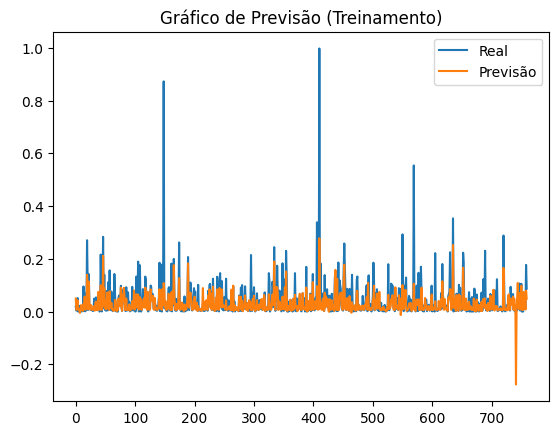

In [59]:
y_prev_treinamento = ensemble_regressores.predict(X_treinamento)

plt.plot(y_treinamento, label="Real")
plt.plot(y_prev_treinamento, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão (Treinamento)")
plt.show()

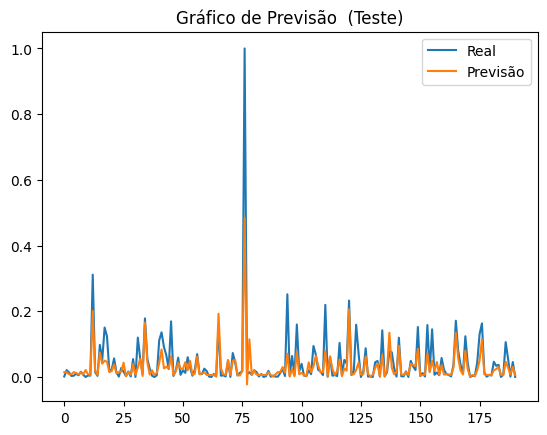

In [60]:
y_prev_teste = ensemble_regressores.predict(X_teste)

plt.plot(y_teste, label="Real")
plt.plot(y_prev_teste, label="Previsão")
plt.legend()

plt.title("Gráfico de Previsão  (Teste)")
plt.show()

In [61]:
# Avaliação do modelo
erro_treinamento = mean_squared_error(y_treinamento, y_prev_treinamento)
erro_teste = mean_squared_error(y_teste, y_prev_teste)

print("Erro de Treinamento:", erro_treinamento)
print("Erro de Teste:", erro_teste)

Erro de Treinamento: 0.0031224803454420365
Erro de Teste: 0.0026018265243606268


# **Experimento com Média e Desvio Padrão**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Função para realizar o experimento
def experimento(modelo, x_treinamento, y_treinamento, x_teste, y_teste, repeticoes):
    resultados = []

    for i in range(repeticoes):

        print('[' + str(i) + ']' + str(modelo))

        modelo.fit(x_treinamento, y_treinamento)
        previsao = modelo.predict(x_teste)
        resultados.append(mean_squared_error(y_teste, previsao))

    media = np.mean(resultados)
    desvio_padrao = np.std(resultados)

    return media, desvio_padrao

# Dividindo os dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


# Configurando os modelos
# nao lineares
mlp = MLPRegressor(activation=mlp_params['activation'],
                   alpha=mlp_params['alpha'],
                   hidden_layer_sizes=mlp_params['hidden_layer_sizes'],
                   max_iter=mlp_params['max_iter'])

svr = svm.SVR(C=svr_params['C'],
              #gamma=svr_params['gamma'],
              kernel=svr_params['kernel'])

clf = tree.DecisionTreeRegressor(max_depth=clf_params['max_depth'],
                                 min_samples_leaf=clf_params['min_samples_leaf'],
                                 min_samples_split=clf_params['min_samples_split'])


# lineares
lasso = linear_model.Lasso(alpha=lasso_params['alpha'],
                         max_iter=lasso_params['max_iter'])


lassoLars = linear_model.LassoLars(alpha=lasso_lars_params['alpha'],
                            max_iter=lasso_lars_params['max_iter'])


lr = LinearRegression(copy_X=lr_params['copy_X'],
                       fit_intercept=lr_params['fit_intercept'])

# ensembles

models=[
        ('mlp', mlp),
        ('svr', svr),
        ('clf', clf),
        ('lasso', lasso),
        ('lassoLars', lassoLars),
        ('lr', lr)
        ]

ensemble_regressores_media = CustomVotingRegressor(models=models,
                                                   voting='mean'
                                                  )


ensemble_regressores_mediana = CustomVotingRegressor(models=models,
                                                     voting='median'
                                                    )


ensemble_regressores_moda = CustomVotingRegressor(models=models,
                                                  voting='mode'
                                                 )


# Definindo o número de repetições
repeticoes = 50

# Realizando o experimento para cada modelo
# nao lineares
media_mlp, desvio_mlp = experimento(mlp, X_treino, y_treino, X_teste, y_teste, repeticoes)
media_svm, desvio_svm = experimento(svr, X_treino, y_treino, X_teste, y_teste, repeticoes)
media_arvore, desvio_arvore = experimento(clf, X_treino, y_treino, X_teste, y_teste, repeticoes)

# lineares
media_lasso, desvio_lasso = experimento(lasso, X_treino, y_treino, X_teste, y_teste, repeticoes)
media_larslasso, desvio_larslasso = experimento(lassoLars, X_treino, y_treino, X_teste, y_teste, repeticoes)
media_linearregression, desvio_linearregression = experimento(lr, X_treino, y_treino, X_teste, y_teste, repeticoes)

# ensembles
media_ensemble_media, desvio_ensemble = experimento(ensemble_regressores_media, X_treino, y_treino, X_teste, y_teste, repeticoes)
media_ensemble_mediana, desvio_ensemble = experimento(ensemble_regressores_mediana, X_treino, y_treino, X_teste, y_teste, repeticoes)
media_ensemble_moda, desvio_ensemble = experimento(ensemble_regressores_moda, X_treino, y_treino, X_teste, y_teste, repeticoes)

# Exibindo os resultados
print("Média e Desvio Padrão dos Erros:")
print("MLPRegressor: Média =", media_mlp, ", Desvio Padrão =", desvio_mlp)
print("Decision Tree: Média =", media_arvore, ", Desvio Padrão =", desvio_arvore)
print("SVM: Média =", media_svm, ", Desvio Padrão =", desvio_svm)

print("Lasso: Média =", media_lasso, ", Desvio Padrão =", desvio_lasso)
print("LassoLars: Média =", media_larslasso, ", Desvio Padrão =", desvio_larslasso)
print("Linear Regression: Média =", media_linearregression, ", Desvio Padrão =", desvio_linearregression)

print("Ensemble Média: Média =", media_ensemble_media, ", Desvio Padrão =", desvio_ensemble)
print("Ensemble Mediana: Média =", media_ensemble_mediana, ", Desvio Padrão =", desvio_ensemble)
print("Ensemble Moda: Média =", media_ensemble_moda, ", Desvio Padrão =", desvio_ensemble)

[0]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[1]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[2]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[3]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[4]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[5]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[6]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[7]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[8]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[9]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[10]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[11]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[12]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[13]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[14]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[15]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[16]MLPRegressor(hidden_layer_sizes=(30,), max_iter=100)
[17]MLPRegressor(hidden_layer_sizes=(30,)

# **Visualização das Previsões dos Modelos para o Conjunto de Teste**

In [62]:
# Realiza as previsões para cada modelo
prediction_mlp = mlp.predict(X_teste)
prediction_arvore=   clf.predict(X_teste)
prediction_svm = svr.predict(X_teste)
prediction_lasso = lasso.predict(X_teste)
prediction_larslasso = lassoLars.predict(X_teste)
prediction_linearregression = lr.predict(X_teste)
prediction_Ensemble = ensemble_regressores.predict(X_teste)

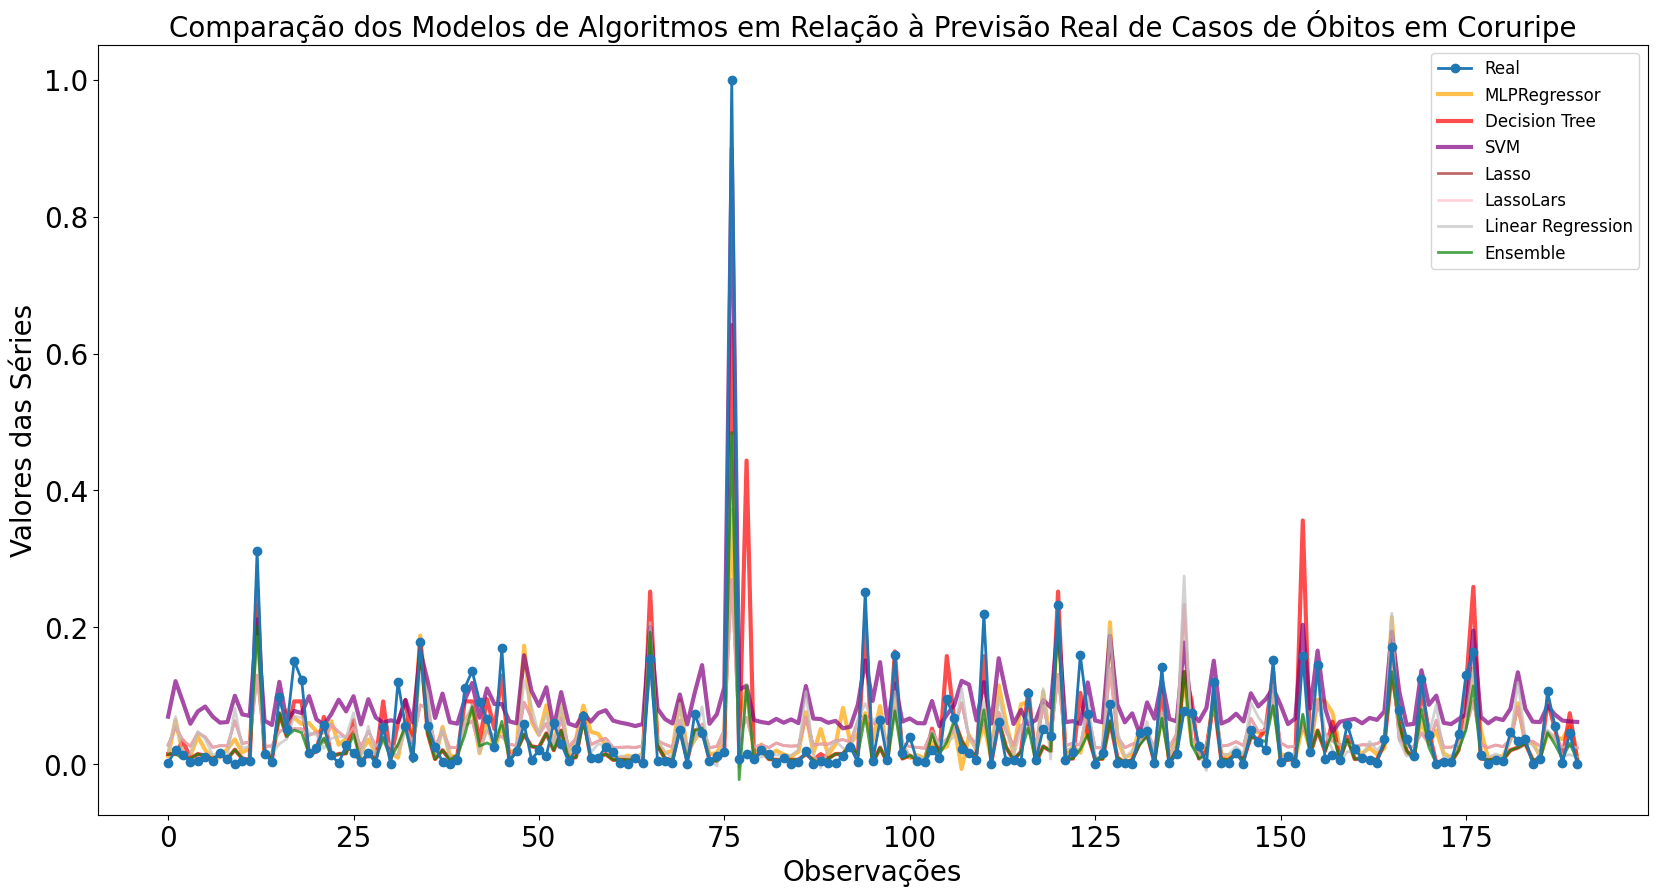

In [63]:
#Importação
import matplotlib.pyplot as plt

# Traçando os valores reais
plt.figure(figsize=(20, 10))
plt.plot(y_teste[-200:], label='Real', linestyle='-', linewidth= 2, marker='o', zorder=2)  # Defina zorder como 2 para mantê-lo em frente


# Traçando as previsões de cada modelo
plt.plot(prediction_mlp[-200:], label='MLPRegressor', linestyle='-', linewidth=3, marker='', zorder=1, alpha=0.7, color='orange')
plt.plot(prediction_arvore[-200:], label='Decision Tree', linestyle='-', linewidth=3, marker='', zorder=1, alpha=0.7, color='red')
plt.plot(prediction_svm[-200:], label='SVM', linestyle='-', linewidth=3, marker='', zorder=1, alpha=0.7, color='purple')
plt.plot(prediction_lasso[-200:], label='Lasso', linestyle='-', linewidth=2, marker='', zorder=1, alpha=0.7, color='brown')
plt.plot(prediction_larslasso[-200:], label='LassoLars', linestyle='-', linewidth=2, marker='', zorder=1, alpha=0.7, color='pink')
plt.plot(prediction_linearregression[-200:], label='Linear Regression', linestyle='-', linewidth=2, marker='', zorder=1, alpha=0.7 , color='silver')
plt.plot(prediction_Ensemble[-200:], label='Ensemble', linestyle='-', linewidth=2, marker='', zorder=1, alpha=0.7, color='green')

#Descrição
plt.xlabel('Observações', fontsize=20)
plt.ylabel('Valores das Séries', fontsize=20)
plt.legend(fontsize=12)
plt.title('Comparação dos Modelos de Algoritmos em Relação à Previsão Real de Casos de Óbitos em Coruripe', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# **Experimento com Teste Estatístico**

In [118]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [119]:
# Configurando os modelos
# nao lineares
mlp = MLPRegressor(activation=mlp_params['activation'],
                   alpha=mlp_params['alpha'],
                   hidden_layer_sizes=mlp_params['hidden_layer_sizes'],
                   max_iter=mlp_params['max_iter'])

svr = svm.SVR(C=svr_params['C'],
              #gamma=svr_params['gamma'],
              kernel=svr_params['kernel'])

clf = tree.DecisionTreeRegressor(max_depth=clf_params['max_depth'],
                                 min_samples_leaf=clf_params['min_samples_leaf'],
                                 min_samples_split=clf_params['min_samples_split'])


# lineares
lasso = linear_model.Lasso(alpha=lasso_params['alpha'],
                         max_iter=lasso_params['max_iter'])


lassoLars = linear_model.LassoLars(alpha=lasso_lars_params['alpha'],
                            max_iter=lasso_lars_params['max_iter'])


lr = LinearRegression(copy_X=lr_params['copy_X'],
                       fit_intercept=lr_params['fit_intercept'])

# ensembles

models=[
        ('mlp', mlp),
        ('svr', svr),
        ('clf', clf),
        ('lasso', lasso),
        ('lassoLars', lassoLars),
        ('lr', lr)
        ]

ensemble_regressores_media = CustomVotingRegressor(models=models,
                                                   voting='mean'
                                                  )


ensemble_regressores_mediana = CustomVotingRegressor(models=models,
                                                     voting='median'
                                                    )


ensemble_regressores_moda = CustomVotingRegressor(models=models,
                                                  voting='mode'
                                                 )

In [120]:
def preprocessamento_serie(serie):

  # lendo a serie
  serie_temporal = pd.read_csv(serie, sep = ",", encoding='latin')['Data de confirmaÃ§Ã£o']

  # normalizando a serie
  serie_normalizada = Normalizar(serie_temporal)

  # separando os padrões e os alvos
  X, y = Janela_tempo(serie_normalizada, 5)

  # definindo o tamanho de treinamento
  tamanho_treinamento = 0.8 * len(serie_normalizada)
  tamanho_treinamento = int(round(tamanho_treinamento))

  # definindo o tamanho de teste
  tamanho_teste = 0.2 * len(serie_normalizada)
  tamanho_teste = int(round(tamanho_teste))

  # conjunto de treinamento
  X_treinamento = X[0:tamanho_treinamento]
  y_treinamento = y[0:tamanho_treinamento]

  # conjunto de teste
  X_teste = X[tamanho_treinamento+1:]
  y_teste = y[tamanho_treinamento+1:]

  # retornando os conjuntos
  return X_treinamento, y_treinamento, X_teste, y_teste


In [121]:
# Função para realizar o experimento
def experimento(modelo, x_treinamento, y_treinamento, x_teste, y_teste, repeticoes):
    resultados = []

    for i in range(repeticoes):

        print('[' + str(i) + ']' + str(modelo))

        modelo.fit(x_treinamento, y_treinamento)
        previsao = modelo.predict(x_teste)
        resultados.append(mean_squared_error(y_teste, previsao))

    return resultados

In [122]:
def rodar_experimento(X_treino, y_treino, X_teste, y_teste, repeticoes = 50):

  # salvar no dataframe
  df = pd.DataFrame()

  # Realizando o experimento para cada modelo
  # nao lineares
  resultados_mlp = experimento(mlp, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['MLP'] = resultados_mlp

  resultados_svm = experimento(svr, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['SVM'] = resultados_svm

  resultados_arvore = experimento(clf, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['THREE'] = resultados_arvore


  # lineares
  resultados_lasso = experimento(lasso, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['LASSO'] = resultados_lasso

  resultados_larslasso = experimento(lassoLars, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['LARS LASSO'] = resultados_larslasso

  resultados_lr = experimento(lr, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['LR'] = resultados_lr


  # ensembles
  resultados_media = experimento(ensemble_regressores_media, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['MEDIA'] = resultados_media

  resultados_mediana = experimento(ensemble_regressores_mediana, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['MEDIANA'] = resultados_mediana

  resultados_moda = experimento(ensemble_regressores_moda, X_treino, y_treino, X_teste, y_teste, repeticoes)
  df['MODA'] = resultados_moda

  # retornando o df
  return df


In [123]:
# salvando todas as series
series = [
          "serie_ALAGOAS_RECUPERADO.csv",
          "serie_ALAGOAS_ÓBITO.csv",
          "serie_ARAPIRACA_RECUPERADO.csv",
          "serie_ARAPIRACA_ÓBITO.csv",
          "serie_CORURIPE_RECUPERADO.csv",
          "serie_CORURIPE_ÓBITO.csv",
          "serie_MACEIÓ_RECUPERADO.csv",
          "serie_MACEIÓ_ÓBITO.csv",
          "serie_PENEDO_RECUPERADO.csv",
          "serie_PENEDO_ÓBITO.csv"
          ]

In [131]:
resultados_final = pd.DataFrame()

# para rodar em todas as series
for se in series:

  # processando os dados
  X_treinamento, y_treinamento, X_teste, y_teste = preprocessamento_serie(se)

  # rodando os experimentos
  resultados = rodar_experimento(X_treinamento, y_treinamento, X_teste, y_teste, repeticoes = 50)

  # concatenando os df
  resultados_final = pd.concat([resultados_final, resultados])


[0]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[1]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[2]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[3]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[4]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[5]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[6]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[7]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[8]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[9]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[10]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[11]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[12]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[13]MLPRegressor(alpha=0.001, hidden_layer_sizes=(30,), max_iter=50)
[14]MLPRegressor(alpha=0.001, hidden_layer_s

In [133]:
pip install autorank

  Preparing metadata (setup.py) ... done
  Created wheel for baycomp: filename=baycomp-1.0.3-py3-none-any.whl size=18026 sha256=3e2ef42480edeadd218890ecaf0911f1f5e96b473b406cff55ccf0bc0cb4a15a
  Stored in directory: /root/.cache/pip/wheels/8a/aa/61/8f1e79a2be629eaa2a72b495c56bb667568dac7c33f4e4c408
Successfully built baycomp


In [134]:
from autorank import autorank, create_report, plot_stats

In [135]:
# computing the most appropriate statistical test
results = autorank(-resultados_final)

In [136]:
# printing the report
create_report(results)

The statistical analysis was conducted for 9 populations with 500 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SVM (p=0.000), THREE (p=0.000), MEDIA (p=0.000), MLP (p=0.000), LARS LASSO (p=0.000), LASSO (p=0.000), MODA (p=0.000), MEDIANA (p=0.000), and LR (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the 

<Axes: >

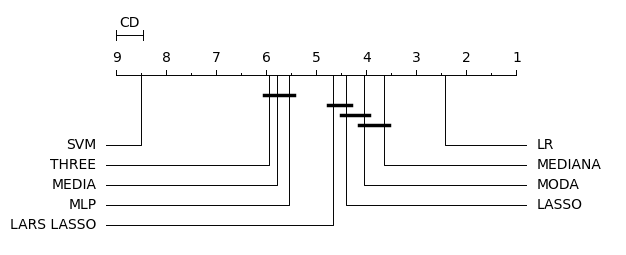

In [137]:
# plotting the results
plot_stats(results, allow_insignificant=True)